In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [3]:
from sklearn.decomposition import PCA

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, cross_val_score

In [5]:
pip install catboost

In [6]:
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from catboost import CatBoostRegressor

In [7]:
from lightgbm.callback import early_stopping, log_evaluation

In [8]:
df_train = pd.read_csv('/content/drive/MyDrive/Santander Value Prediction/train.csv')

In [9]:
df_test = pd.read_csv('/content/drive/MyDrive/Santander Value Prediction/test.csv')

In [10]:
df_train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB


In [13]:
df_train.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [14]:
df_test.describe()

,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,dc5a8f1d8,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,...,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04,4.934200e+04
mean,5.773787e+04,6.258726e+04,1.036752e+05,6.289853e+04,6.713354e+04,8.083879e+04,6.181014e+04,5.515752e+04,1.406324e+06,8.128668e+04,...,1.193910e+05,1.355955e+05,3.242217e+05,1.437856e+05,9.302367e+04,8.047145e+04,6.076865e+04,1.323210e+05,1.675766e+05,1.282487e+05
std,1.745182e+06,2.322787e+06,2.586951e+06,2.765941e+06,3.206124e+06,2.845031e+06,2.780137e+06,1.923517e+06,6.872366e+06,2.378938e+06,...,3.115190e+06,2.598454e+06,3.782996e+06,3.663374e+06,5.041000e+06,2.100210e+06,2.040655e+06,3.592018e+06,3.761816e+06,2.413798e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.504447e+08,2.283295e+08,2.758171e+08,3.972621e+08,4.667591e+08,2.852223e+08,4.863751e+08,2.043290e+08,3.435658e+08,2.310167e+08,...,5.351692e+08,1.236547e+08,3.793398e+08,4.025480e+08,9.657530e+08,1.680065e+08,2.497913e+08,3.200000e+08,3.186300e+08,2.189782e+08


In [15]:
print(f"Amount of rows/columns originally df_train: {df_train.shape}")
print(f"Amount of rows/columns originally df_test: {df_test.shape}")

Amount of rows/columns originally df_train: (4459, 4993)
Amount of rows/columns originally df_test: (49342, 4992)


We see a lot of 0's ==> Sparse data (unnecessary info, bad for model, a lot of memory usage)

In [16]:
const_columns_to_remove = []
for col in df_train.columns:
    if col != 'ID' and col != 'target':
        if df_train[col].std() == 0:
            const_columns_to_remove.append(col)
print(const_columns_to_remove)
# Now remove that array of const columns from the data
df_train.drop(const_columns_to_remove, axis=1, inplace=True)
df_test.drop(const_columns_to_remove, axis=1, inplace=True)

# Print to see the reduction of columns
print('train_df rows and columns after removing constant columns: ', df_train.shape)
print('test_df rows and columns after removing constant columns: ', df_test.shape)
print(f'Following {len(const_columns_to_remove)} Constant Column(s) are removed')


['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '992e6d1d3', '90a742107', '08b9ec4ae', 'd95203ded'

In [36]:
df_test.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Have a look at the target var ==> continuous values - the task of regression

In [17]:
df_train['target'].value_counts()

,count
target,
2000000.0,207
10000000.0,199
20000000.0,156
4000000.0,148
1000000.0,129
...,...
19552000.0,1
13598000.0,1
3442000.0,1


In [18]:
df_train['target'].describe()

,target
count,4.459000e+03
mean,5.944923e+06
std,8.234312e+06
min,3.000000e+04
25%,6.000000e+05
50%,2.260000e+06
75%,8.000000e+06
max,4.000000e+07


In [19]:
df_train.isna().sum()

,0
ID,0
target,0
48df886f9,0
0deb4b6a8,0
34b15f335,0
...,...
71b203550,0
137efaa80,0
fb36b89d9,0
7e293fbaf,0


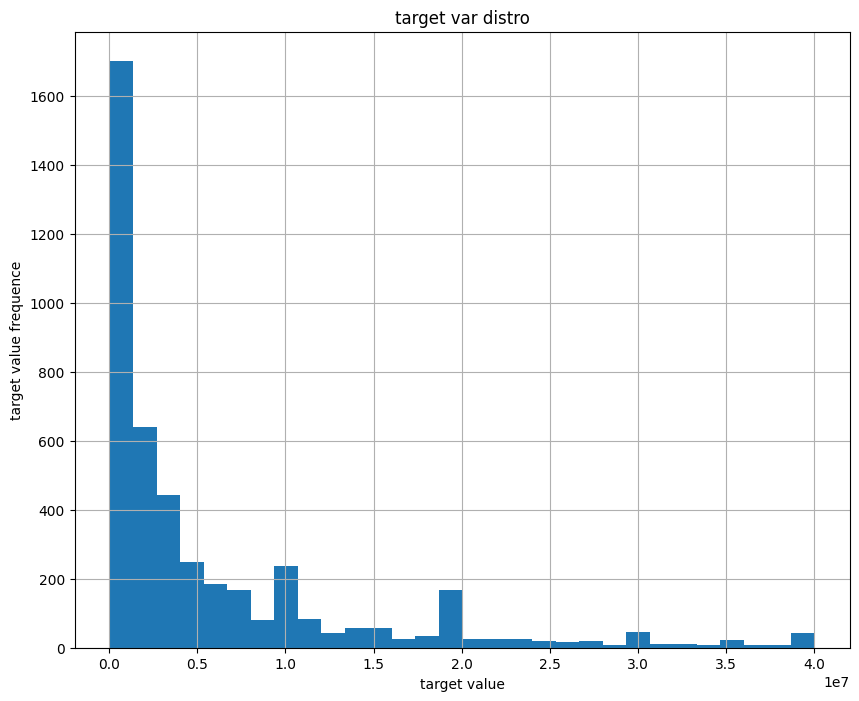

In [20]:
plt.figure(figsize=(10,8))
df_train['target'].hist(bins=30)
plt.title('target var distro')
plt.xlabel('target value')
plt.ylabel('target value frequence')
plt.grid(True)
plt.show()

huge kurtosis == problems => normalize data
huge variance
Since the target has high variance and we're using rmsle we can log the target

In [21]:
X_train = df_train.drop(['ID', 'target'], axis=1)

y_train = np.log1p(df_train['target'])

# X_test_original = df_test.drop('ID', axis=1)

X_train_split, X_validation, y_train_split, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

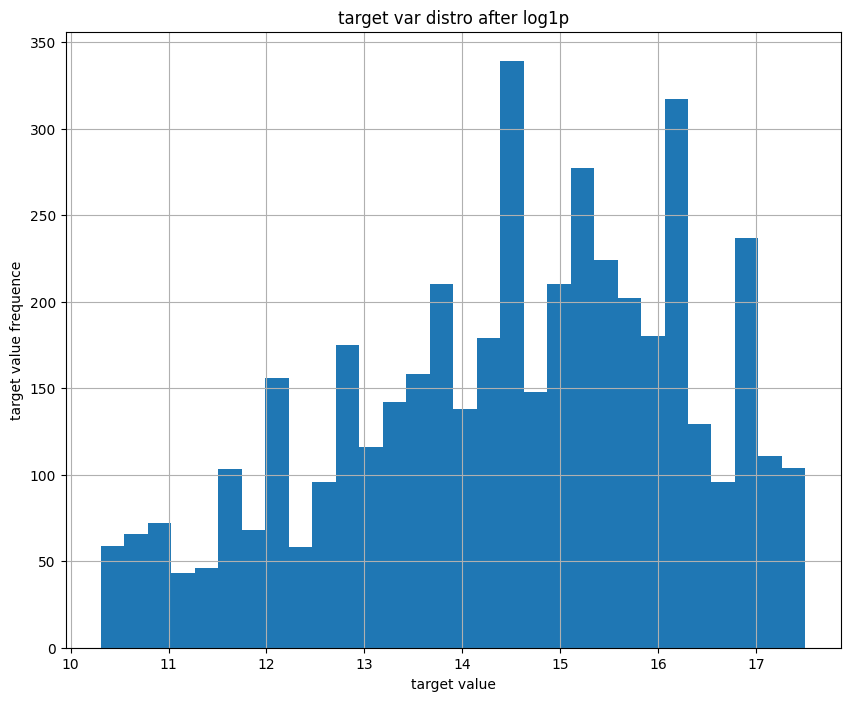

In [22]:
plt.figure(figsize=(10,8))
y_train.hist(bins=30)
plt.title('target var distro after log1p')
plt.xlabel('target value')
plt.ylabel('target value frequence')
plt.grid(True)
plt.show()

Looks more like Gaussian distro now

Checking validity of data for training

In [23]:
assert not X_train_split.isnull().values.any(), "X_train contains NaN!"
assert not y_train_split.isnull().values.any(), "y_train contains NaN!"
assert not np.isinf(X_train_split.values).any(), "X_train contains Inf!"
assert not np.isinf(y_train_split.values).any(), "y_train contains Inf!"
assert np.all(y_train_split >= 0), "y_train_sample contains negative values!"
assert np.all(X_train_split >= 0), "x_train_sample contains negative values!"

assert not X_validation.isnull().values.any(), "X_validation contains NaN!"
assert not y_validation.isnull().values.any(), "y_validation contains NaN!"
assert not np.isinf(X_validation.values).any(), "X_validation contains Inf!"
assert not np.isinf(y_validation.values).any(), "y_validation contains Inf!"
assert np.all(y_validation >= 0), "y_validation contains negative values!"
assert np.all(X_validation >= 0), "X_validation contains negative values!"

In [ ]:
corr_matrix = X_train_split.corr()

In [ ]:
threshold = 0.7
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):  # Избегаем дублирования
        if abs(corr_matrix.iloc[i, j]) > threshold:  # Берем по модулю
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))


high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature1", "Feature2", "Correlation"])

# Выводим высоко коррелированные пары
high_corr_df.sort_values(by="Correlation", ascending=False)

to manually drop correlated columns seems too much, I'll try to apply PCA with 0.95 variance explained

In [25]:
print(f"Amount of rows/columns originally X_train_split: {X_train_split.shape}")
print(f"Amount of rows/columns originally X_validation: {X_validation.shape}")
print(f"Amount of rows/columns originally X_test_original: {df_test.shape}")

Amount of rows/columns originally X_train_split: (3567, 4735)
Amount of rows/columns originally X_validation: (892, 4735)
Amount of rows/columns originally X_test_original: (49342, 4736)


Finding PCA from training data X_train_split

In [26]:
pca = PCA(n_components=0.95)
pca.fit(X_train_split)

PCA(n_components=0.95)

Transoformation of data - checking how many components we have afterwards:

4736 columns ==> 524 (8 times better with 95% of info kept)

In [27]:
# Преобразуем X_train_split
X_train_pca = pca.transform(X_train_split)
print(f'num of features after PCA for X_train: {X_train_pca.shape}')
# Преобразуем X_validation
X_validation_pca = pca.transform(X_validation)
print(f'num of features after PCA for X_validation: {X_validation_pca.shape}')
# Преобразуем X_test_original
X_test_pca = pca.transform(X_test_original)
print(f'num of features after PCA for X_test_original: {X_test_pca.shape}')

num of features after PCA for X_train: (3567, 524)
num of features after PCA for X_validation: (892, 524)
num of features after PCA for X_test_original: (49342, 524)


Anyways linear models don't work well

A dictionary for all models to compare root mse results

In [28]:
results = {}

In [26]:
def rmsle_metric(y_pred, dataset):
    y_true = dataset.get_label()
    y_pred = np.maximum(0, y_pred)  # Предсказания не могут быть отрицательными
    rmsle = np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))
    return 'rmsle', rmsle, False

def rmsle(y_true, y_pred):
    y_true = np.maximum(0, y_true)
    y_pred = np.maximum(0, y_pred)
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))

In [29]:
# LightGBM модель
params_lgb = {
    "objective": "regression",
    "metric": "None",
    "num_leaves": 100,
    "learning_rate": 0.01,
    "bagging_fraction": 0.8,
    "feature_fraction": 0.8,
    "seed": 42
}

lg_train = lgb.Dataset(X_train_split, label=y_train_split)
lg_validation = lgb.Dataset(X_validation, label=y_validation)

model_lgb = lgb.train(
    params_lgb,
    lg_train,
    num_boost_round=5000,
    valid_sets=[lg_train, lg_validation],
    feval=rmsle_metric,
    callbacks=
    [
        early_stopping(stopping_rounds=200),
        log_evaluation(period=150)
    ]
)

y_pred_lgb_log = model_lgb.predict(X_validation, num_iteration=model_lgb.best_iteration)
y_pred = np.expm1(y_pred_lgb_log)
y_val = np.expm1(y_validation)
results['LightGBM'] = rmsle(y_val, y_pred)  # RMSLE
print(f"LightGBM RMSLE: {results['LightGBM']}")

results['LightGBM_log'] = rmsle(y_validation, y_pred_lgb_log)
print(f"LightGBM RMSLE (log space): {results['LightGBM_log']}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.173158 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 132354
[LightGBM] [Info] Number of data points in the train set: 3567, number of used features: 3301
[LightGBM] [Info] Start training from score 14.490748
Training until validation scores don't improve for 200 rounds
[150]	training's rmsle: 0.075565	valid_1's rmsle: 0.0961393
[300]	training's rmsle: 0.0566138	valid_1's rmsle: 0.0941892
[450]	training's rmsle: 0.0457005	valid_1's rmsle: 0.0942559
Early stopping, best iteration is:
[337]	training's rmsle: 0.0534106	valid_1's rmsle: 0.0941002
LightGBM RMSLE: 1.4077403731797677
LightGBM RMSLE (log space): 0.0941001813059827


In [33]:
y_val

,target
297,10000000.00
2268,8000000.00
2413,4466666.66
3541,200000.00
3915,2640000.00
...,...
4101,13000000.00
1616,2000000.00
1620,400000.00
1634,1240000.00


In [30]:
X_without_id = df_test.drop(['ID'], axis=1)

y_pred_test_lgb_log = model_lgb.predict(X_without_id, num_iteration=model_lgb.best_iteration)
y_pred_test = np.expm1(y_pred_test_lgb_log)

submission = pd.DataFrame({
    'ID': df_test['ID'],
    'target': y_pred_test
})

submission.to_csv('submission_2.csv', index=False)

print("Submission file created as 'submission_2.csv'")

Submission file created as 'submission.csv'


In [31]:
# CatBoost модель
model_cat = CatBoostRegressor(
    iterations=5000,
    learning_rate=0.01,
    depth=6,
    eval_metric='RMSE',
    random_seed=42,
    od_type='Iter',
    od_wait=100,
    verbose=150
)

model_cat.fit(
    X_train_split, y_train_split,
    eval_set=(X_validation, y_validation),
    use_best_model=True,
    verbose=100,
    plot=True
)

y_pred_cat_log = model_cat.predict(X_validation)
y_pred_cat = np.expm1(y_pred_cat_log)
y_val = np.expm1(y_validation)

results['CatBoost'] = rmsle(y_val, y_pred_cat)  # RMSLE
print(f"CatBoost RMSLE: {results['CatBoost']}")

results['CatBoost_log'] = rmsle(y_validation, y_pred_cat_log)
print(f"CatBoost RMSLE (log space): {results['CatBoost_log']}")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.7622822	test: 1.6946920	best: 1.6946920 (0)	total: 1.13s	remaining: 1h 34m 17s
100:	learn: 1.6421646	test: 1.6043613	best: 1.6043613 (100)	total: 40.7s	remaining: 32m 52s
200:	learn: 1.5730647	test: 1.5595470	best: 1.5595470 (200)	total: 1m 30s	remaining: 36m 2s
300:	learn: 1.5277443	test: 1.5342760	best: 1.5342760 (300)	total: 2m 11s	remaining: 34m 10s
400:	learn: 1.4938421	test: 1.5176689	best: 1.5176281 (399)	total: 2m 49s	remaining: 32m 26s
500:	learn: 1.4672207	test: 1.5066409	best: 1.5066409 (500)	total: 3m 30s	remaining: 31m 31s
600:	learn: 1.4463903	test: 1.4977266	best: 1.4977266 (600)	total: 4m 10s	remaining: 30m 34s
700:	learn: 1.4258030	test: 1.4913962	best: 1.4913962 (700)	total: 4m 50s	remaining: 29m 43s
800:	learn: 1.4060722	test: 1.4850342	best: 1.4850342 (800)	total: 5m 33s	remaining: 29m 8s
900:	learn: 1.3854985	test: 1.4794747	best: 1.4794747 (900)	total: 6m 12s	remaining: 28m 16s
1000:	learn: 1.3648458	test: 1.4733752	best: 1.4733301 (998)	total: 6m 54s	

In [32]:
y_pred_test_cat_log = model_cat.predict(X_without_id)
y_pred_test = np.expm1(y_pred_test_cat_log)

submission = pd.DataFrame({
    'ID': df_test['ID'],
    'target': y_pred_test
})

submission.to_csv('submission_2.csv', index=False)

print("Submission file created as 'submission_2.csv'")

Submission file created as 'submission_2.csv'


In [32]:
# Вывод результатов
for model_name, rmse_value in results.items():
    print(f"{model_name} RMSE: {rmse_value}")

LightGBM RMSE: 1.4077403731797677
LightGBM_log RMSE: 0.0941001813059827


In [ ]:
baseline_pred = np.full_like(y_validation, np.mean(y_train_split))
baseline_rmsle = rmsle(np.expm1(y_validation), np.expm1(baseline_pred))
print(f"Baseline RMSLE: {baseline_rmsle}")


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error

# Compute residuals
residuals_lightgbm = y_val - y_pred
residuals_catboost = y_val - y_pred_cat
residuals_lightgbm = pd.Series(residuals_lightgbm, index=y_val.index)

print(f"Length of y_val: {len(y_val)}")
print(f"Length of y_pred: {len(y_pred)}")
print(f"Length of residuals_lightgbm: {len(residuals_lightgbm)}")

# Plot histogram of residuals
plt.figure(figsize=(14, 6))

# LightGBM Residuals Histogram
plt.subplot(1, 2, 1)
plt.hist(residuals_lightgbm, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.title("LightGBM Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)

# CatBoost Residuals Histogram
plt.subplot(1, 2, 2)
plt.hist(residuals_catboost, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.title("CatBoost Residuals Histogram")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(True)

plt.tight_layout()
plt.show()

# Scatter plot of predictions vs residuals
plt.figure(figsize=(10, 6))

# LightGBM Predictions vs Residuals
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals_lightgbm, alpha=0.5, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("LightGBM Predictions vs Residuals")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.grid(True)

# CatBoost Predictions vs Residuals
plt.subplot(1, 2, 2)
plt.scatter(y_pred_cat, residuals_catboost, alpha=0.5, color='green', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')
plt.title("CatBoost Predictions vs Residuals")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.grid(True)

plt.tight_layout()
plt.show()

# Identify potential outliers
outliers_lightgbm = residuals_lightgbm[residuals_lightgbm.abs() > 3 * residuals_lightgbm.std()]
outliers_catboost = np.where(np.abs(residuals_catboost) > 3 * np.std(residuals_catboost))[0]

# Display summary of outliers
print(f"Number of potential outliers in LightGBM predictions: {len(outliers_lightgbm)}")
print(f"Number of potential outliers in CatBoost predictions: {len(outliers_catboost)}")


# Show some outliers for LightGBM
outlier_data_lightgbm = pd.DataFrame({
    'Actual': y_val.loc[outliers_lightgbm.index],  # Индексы из y_val
    'Predicted': pd.Series(y_pred, index=y_val.index).loc[outliers_lightgbm.index],  # Преобразуем y_pred в Series
    'Residual': outliers_lightgbm
})

print(outlier_data_lightgbm.head())


In [ ]:
def rmsle_metric_xgb(y_pred, dtrain):
    y_true = dtrain.get_label()
    y_pred = np.maximum(0, y_pred)  # Предсказания не могут быть отрицательными
    rmsle = np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_true))**2))
    return 'rmsle', rmsle

In [ ]:
import xgboost as xgb

# Преобразование данных в формат DMatrix
dtrain = xgb.DMatrix(X_train_split, label=y_train_split)
dval = xgb.DMatrix(X_validation, label=y_validation)

# Параметры для XGBoost
params_xgb = {
    "objective": "reg:squarederror",
    "learning_rate": 0.01,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}

# Обучение модели
model_xgb = xgb.train(
    params=params_xgb,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, 'train'), (dval, 'validation')],
    feval=rmsle_metric_xgb,  # Пользовательская метрика
    early_stopping_rounds=100,
    verbose_eval=100
)

# Предсказания
y_pred_xgb_log = model_xgb.predict(dval)
y_pred_xgb = np.expm1(y_pred_xgb_log)  # Обратное преобразование

# Вычисление RMSLE
results['XGBoost'] = rmsle(np.expm1(y_validation), y_pred_xgb)  # RMSLE в исходном пространстве
results['XGBoost_log'] = rmsle(y_validation, y_pred_xgb_log)  # RMSLE в лог-пространстве

print(f"XGBoost RMSLE: {results['XGBoost']}")
print(f"XGBoost RMSLE (log space): {results['XGBoost_log']}")

In [ ]:
pip install optuna

In [ ]:
# Вывод результатов
for model_name, rmsle_value in results.items():
    print(f"{model_name} RMSLE: {rmsle_value}")